In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read url for advanced stats data
df = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2019_advanced.html')
'%s' % type(df)


"<class 'list'>"

In [3]:
# read_html returns list object
# data in first index of list for Basketball Reference
df = pd.DataFrame(df[0])

In [4]:
# Check shape
df.shape

(714, 29)

In [5]:
# Remember to turn stats data into floats
# Also, drop rows that repeat the headers
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 29 columns):
Rk             714 non-null object
Player         714 non-null object
Pos            714 non-null object
Age            714 non-null object
Tm             714 non-null object
G              714 non-null object
MP             714 non-null object
PER            714 non-null object
TS%            708 non-null object
3PAr           705 non-null object
FTr            705 non-null object
ORB%           714 non-null object
DRB%           714 non-null object
TRB%           714 non-null object
AST%           714 non-null object
STL%           714 non-null object
BLK%           714 non-null object
TOV%           708 non-null object
USG%           714 non-null object
Unnamed: 19    0 non-null float64
OWS            714 non-null object
DWS            714 non-null object
WS             714 non-null object
WS/48          714 non-null object
Unnamed: 24    0 non-null float64
OBPM           714 non

In [6]:
# Iterate throguh DataFrame and drop all header rows
for num, row in df.iterrows():
    if row['Rk'] == 'Rk':
        df.drop(num, axis=0, inplace=True)

In [7]:
# Designate cols to convert to columns
cols = ['Rk', 'Age', 'G', 'MP', 'PER', 'TS%', '3PAr', 
        'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 
        'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48',
        'OBPM', 'DBPM', 'BPM', 'VORP']
for i in cols:
    df[i] = df[i].astype(float).fillna(0)

In [8]:
df.columns
df.drop(['Unnamed: 19', 'Unnamed: 24'], axis=1, inplace=True)

In [10]:
# Sort by BPM in descending order
bpm_lead = df.sort_values('BPM', ascending=False)
bpm_lead.head(5)

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
8,9.0,Rawle Alkins,SG,21.0,CHI,3.0,6.0,37.9,0.375,0.250,...,0.0,29.2,0.0,0.0,0.0,0.351,20.0,7.2,27.2,0.0
535,391.0,Gary Payton,PG,26.0,WAS,3.0,16.0,37.0,0.688,0.250,...,11.1,23.9,0.1,0.0,0.1,0.359,9.8,5.1,15.0,0.1
269,202.0,James Harden,SG,29.0,HOU,69.0,2575.0,30.5,0.612,0.537,...,14.5,40.6,10.0,3.1,13.1,0.245,10.5,0.9,11.4,8.7
19,18.0,Giannis Antetokounmpo,PF,24.0,MIL,66.0,2173.0,30.7,0.643,0.156,...,15.2,32.1,8.1,5.2,13.2,0.292,5.7,5.2,10.9,7.1
127,98.0,Troy Caupain,PG,23.0,ORL,3.0,12.0,32.0,0.667,0.500,...,0.0,21.8,0.1,0.0,0.1,0.375,9.7,0.2,9.9,0.0


In [11]:
bpm_lead['MP'].max()

2786.0

In [12]:
bpm_min1k = bpm_lead[bpm_lead['MP'] >= 1000]

In [13]:
bpm_min1k[bpm_min1k['Player'] == 'Joel Embiid']

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
204,154.0,Joel Embiid,C,24.0,PHI,60.0,2031.0,25.9,0.595,0.218,...,13.4,33.0,4.7,3.6,8.3,0.196,1.7,2.0,3.7,2.9


In [14]:
bpm_min1k.sort_values(['USG%'], ascending=False)['USG%'].head(5)

269    40.6
204    33.0
685    32.7
71     32.2
19     32.1
Name: USG%, dtype: float64

In [15]:
bpm_min1k.stack()[:15]

269  Rk                 202
     Player    James Harden
     Pos                 SG
     Age                 29
     Tm                 HOU
     G                   69
     MP                2575
     PER               30.5
     TS%              0.612
     3PAr             0.537
     FTr              0.453
     ORB%               2.5
     DRB%              17.2
     TRB%               9.7
     AST%              39.7
dtype: object

In [16]:
# Create figure object to plot on
fig = plt.figure(figsize=(10, 20))

<Figure size 720x1440 with 0 Axes>

In [17]:
# Create subplot of Figure object
ax1 = fig.add_subplot(1,1,1)
ax1

In [18]:
ax1.scatter('BPM', 'USG%', data=bpm_min1k)

In [19]:
bpm_min1k['BPM'][:10]

269    11.4
19     10.9
354     9.8
164     8.7
334     7.8
646     7.4
246     6.9
660     6.7
323     6.7
675     6.2
Name: BPM, dtype: float64

In [20]:
bpm_min1k.index.name = 'Num'
bpm_min1k.index.name

'Num'

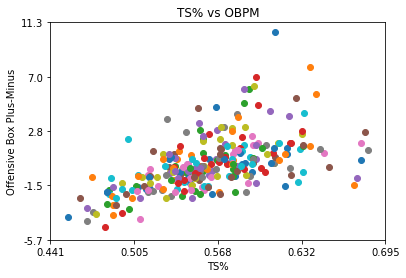

In [21]:
ax1 = plt.subplot2grid((1,1), (0,0))
for num, row in bpm_min1k.iterrows():
    ax1.scatter(row['TS%'], row['OBPM'], label=num)
    
ax1.set_xlabel('TS%')
ax1.set_ylabel('Offensive Box Plus-Minus')
ymin, ymax = ax1.get_ylim()
xmin, xmax = ax1.get_xlim()
y = np.linspace(ymin, ymax, 5)
x = np.linspace(xmin, xmax, 5)
ax1.set_title('TS% vs OBPM')
ax1.set_yticks(y)
ax1.set_yticklabels(np.round(y, 1))
ax1.set_xticks(x)
ax1.set_xticklabels(np.round(x, 3))
plt.show()

In [22]:
np.linspace(float(bpm_min1k['TS%'].min()), float(bpm_min1k['TS%'].max()), 5)

array([0.455  , 0.51175, 0.5685 , 0.62525, 0.682  ])

In [23]:
def make_scatter(df, x, y, length=2):
    df = df.copy()
    ax1 = plt.subplot2grid((1,1), (0,0))
    for num, row in df.iterrows():
        ax1.scatter(row[x], row[y], label=num)

    ax1.set_xlabel(x)
    ax1.set_ylabel(y)
    ymin, ymax = ax1.get_ylim()
    xmin, xmax = ax1.get_xlim()
    ys = np.linspace(ymin, ymax, 5)
    xs = np.linspace(xmin, xmax, 5)
    ax1.set_title('%s vs %s' % (x, y))
    ax1.set_yticks(ys)
    ax1.set_yticklabels(np.round(ys, length))
    ax1.set_xticks(xs)
    ax1.set_xticklabels(np.round(xs, length))
    #ax1.legend(bbox_to_anchor=(1.04,1))
    plt.show()

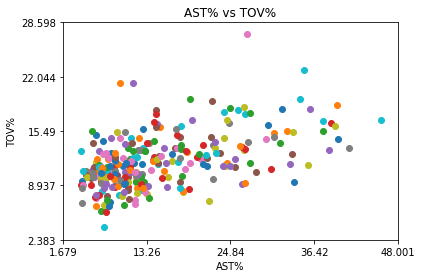

In [24]:
make_scatter(bpm_min1k, 'AST%', 'TOV%', length=3)

In [25]:
bpm_min1k.loc[bpm_min1k['TS%'].idxmax(), :]

Rk                   79
Player    Thomas Bryant
Pos                   C
Age                  21
Tm                  WAS
G                    64
MP                 1251
PER                21.3
TS%               0.682
3PAr              0.184
FTr               0.278
ORB%                  8
DRB%               24.6
TRB%               16.2
AST%                8.8
STL%                0.9
BLK%                3.9
TOV%                  9
USG%               17.3
OWS                 3.8
DWS                 1.1
WS                  4.9
WS/48             0.186
OBPM                1.3
DBPM                0.3
BPM                 1.6
VORP                1.1
Name: 93, dtype: object

In [26]:
maxmin = {}
for i in ['G', 'MP', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM',
       'DBPM', 'BPM', 'VORP']:
    maxmin[i] = (bpm_min1k[i].astype(float).idxmax(), bpm_min1k[i].astype(float).idxmin())

maxmin

{'G': (48, 667),
 'MP': (48, 403),
 'PER': (19, 74),
 'TS%': (93, 87),
 '3PAr': (461, 246),
 'FTr': (246, 74),
 'ORB%': (192, 379),
 'DRB%': (361, 220),
 'TRB%': (678, 220),
 'AST%': (675, 448),
 'STL%': (604, 410),
 'BLK%': (567, 66),
 'TOV%': (257, 233),
 'USG%': (269, 649),
 'OWS': (269, 329),
 'DWS': (19, 589),
 'WS': (19, 329),
 'WS/48': (19, 329),
 'OBPM': (269, 329),
 'DBPM': (567, 156),
 'BPM': (269, 156),
 'VORP': (269, 589)}

In [27]:
with open(r'C:\Users\afs95\MyPython\Basketball\CurrentAdvancedLeaders.txt', 'w') as f:
    f.write('Current league leaders with minimum of 1000MP:\n')
    for key in maxmin.keys():
        f.write('Current %s leader in the league is: %s\n' % (key, bpm_min1k.loc[maxmin[key][0], 'Player']))
        f.write('Worst %s in the league is: %s\n' % (key, bpm_min1k.loc[maxmin[key][1], 'Player']))

In [28]:
stats_cols = list(maxmin.keys())

In [29]:
#for i in list(maxmin.keys()):
#        make_scatter(bpm_min1k, 'TS%', i)

In [30]:
#for line in open(r'C:\Users\afs95\MyPython\Basketball\CurrentAdvancedLeaders.txt').readlines():
#    print(line)

In [31]:
import Stats

In [32]:
x = Stats.Stats()
x

In [33]:
[i for i in x.__dir__() if not i.startswith('__')]

['leader_dict', 'league_leader']

In [34]:
x.league_leader.__doc__

'Find the player with the lowest and highest of a stat\n        and write to a file'

In [ ]:
#imp.reload(Stats)

In [36]:
import datetime

In [39]:
file = 'AdvancedStatLeaders_%s%s%s.txt' % (datetime.datetime.today().month, datetime.datetime.today().day, datetime.datetime.today().year)

In [40]:
x.league_leader(bpm_min1k, stats_cols, file)

In [41]:
import imp

In [42]:
imp.reload(Stats)

<module 'Stats' from 'C:\\Users\\afs95\\MyPython\\Basketball\\Stats.py'>

In [45]:
stats = Stats.Stats(bpm_min1k)

In [54]:
stats.find_leaders('BPM')[269:]

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
Num,,,,,,,,,,,,,,,,,,,,,
420,311.0,Shelvin Mack,PG,28.0,TOT,56.0,1236.0,10.7,0.491,0.326,...,12.8,18.1,-0.1,1.1,1.0,0.040,-2.4,-1.5,-3.9,-0.6
648,469.0,Allonzo Trier,SG,23.0,NYK,64.0,1459.0,12.2,0.564,0.255,...,15.8,21.3,0.5,0.5,0.9,0.030,-2.1,-2.0,-4.0,-0.7
290,218.0,Mario Hezonja,SF,23.0,NYK,52.0,1027.0,10.3,0.489,0.336,...,12.9,20.5,-0.9,0.9,-0.1,-0.003,-3.8,-0.7,-4.5,-0.6
586,430.0,Wayne Selden,SG,24.0,TOT,67.0,1233.0,8.5,0.501,0.367,...,13.1,18.1,-0.6,0.7,0.0,0.002,-3.3,-1.6,-4.9,-0.9
329,249.0,Josh Jackson,SG,21.0,PHO,73.0,1771.0,10.2,0.483,0.263,...,16.6,24.2,-2.8,1.1,-1.7,-0.047,-4.7,-0.5,-5.1,-1.4
327,247.0,Frank Jackson,PG,20.0,NOP,59.0,1109.0,8.9,0.509,0.373,...,9.1,18.2,-0.1,0.4,0.3,0.014,-2.4,-2.7,-5.1,-0.9
526,384.0,Tony Parker,PG,36.0,CHO,56.0,1003.0,15.4,0.512,0.110,...,12.7,25.3,0.7,0.4,1.0,0.050,-1.5,-3.7,-5.2,-0.8
589,431.0,Collin Sexton,PG,20.0,CLE,73.0,2269.0,11.7,0.515,0.230,...,12.5,25.3,-0.4,-0.3,-0.7,-0.014,-1.8,-3.5,-5.3,-1.9
375,278.0,Kevin Knox,PF,19.0,NYK,66.0,1872.0,8.7,0.474,0.391,...,9.9,22.1,-1.8,0.7,-1.1,-0.028,-3.5,-2.4,-5.9,-1.8


In [1]:
import seaborn as sns